In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import approximation
import matplotlib.pyplot as plt
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

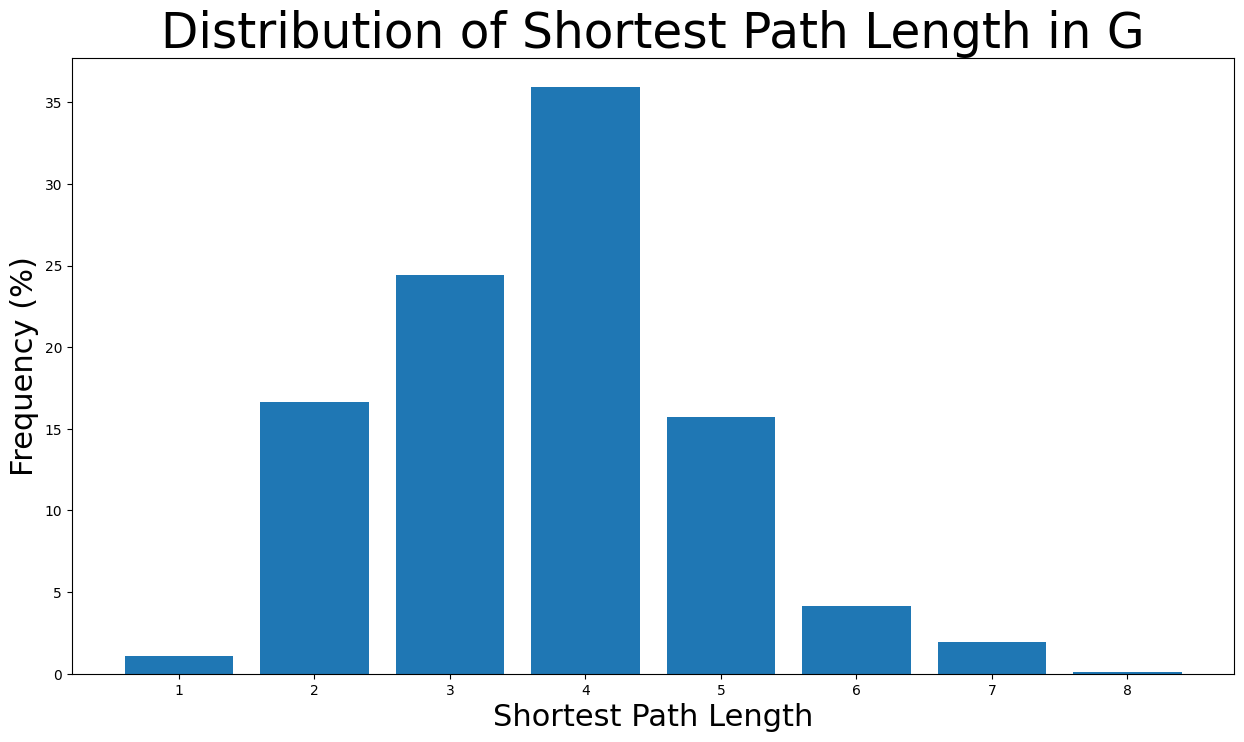

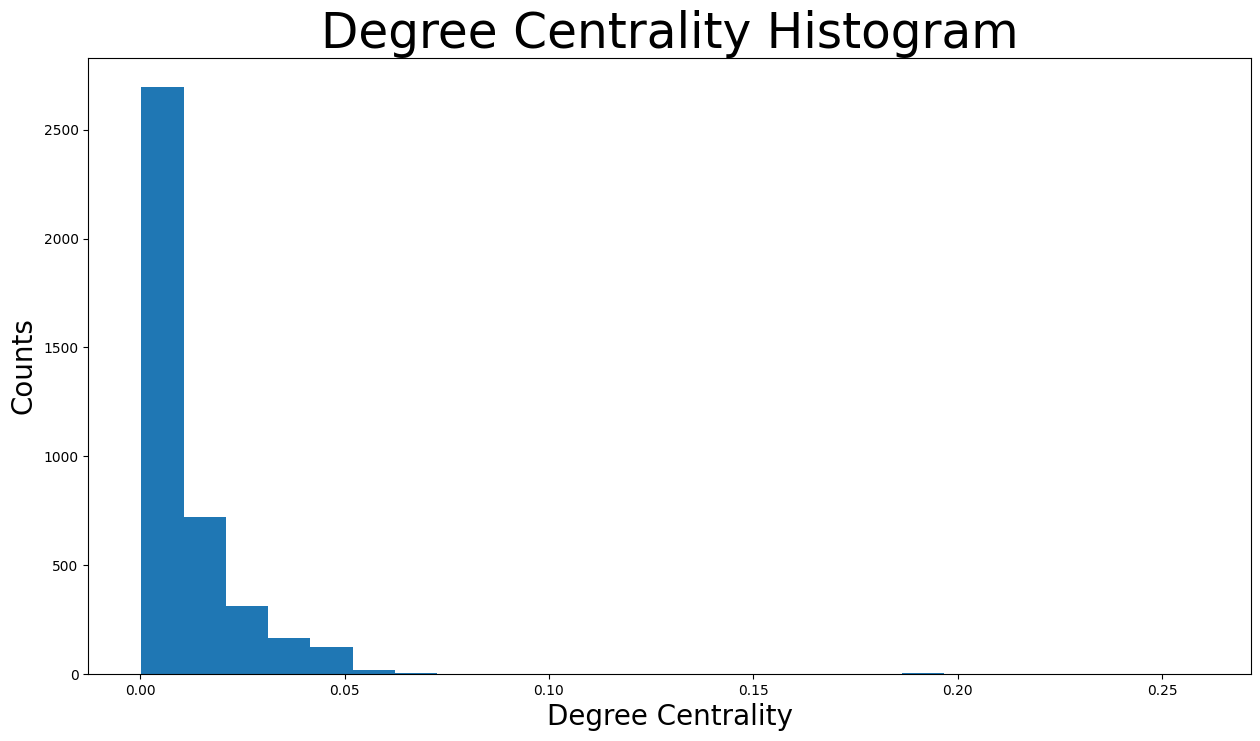

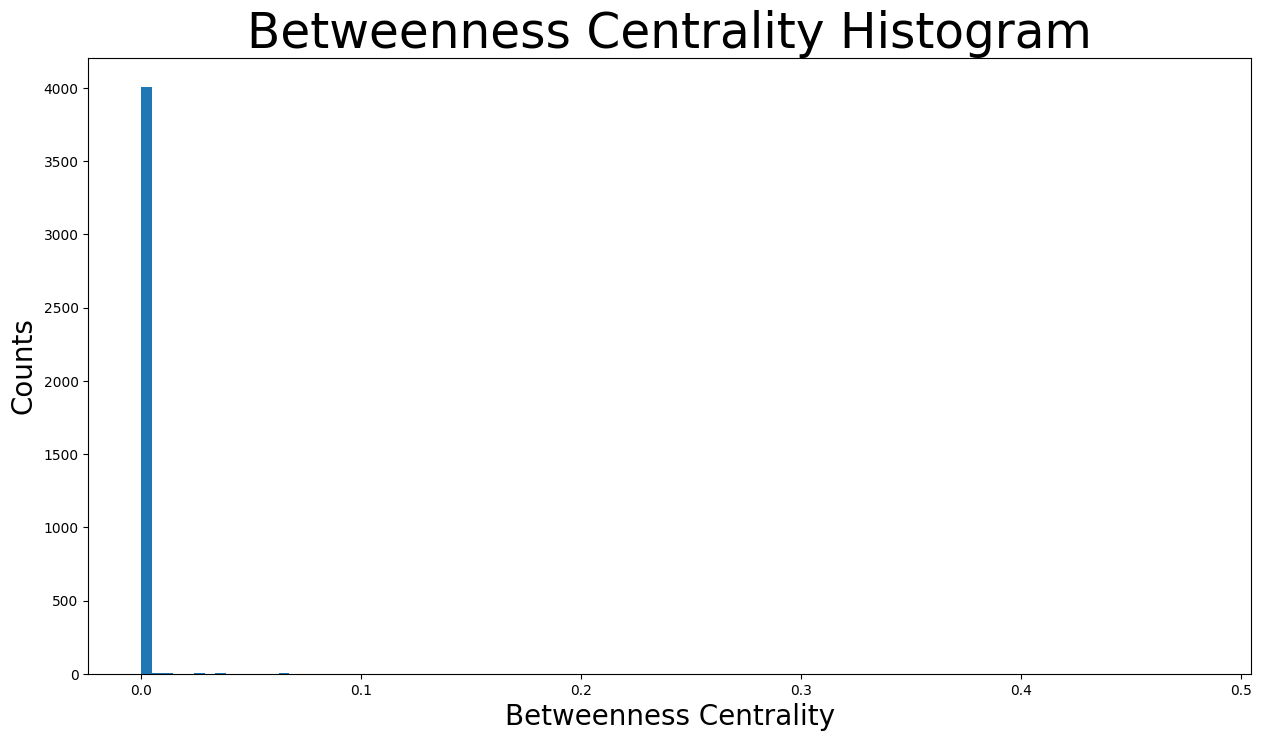

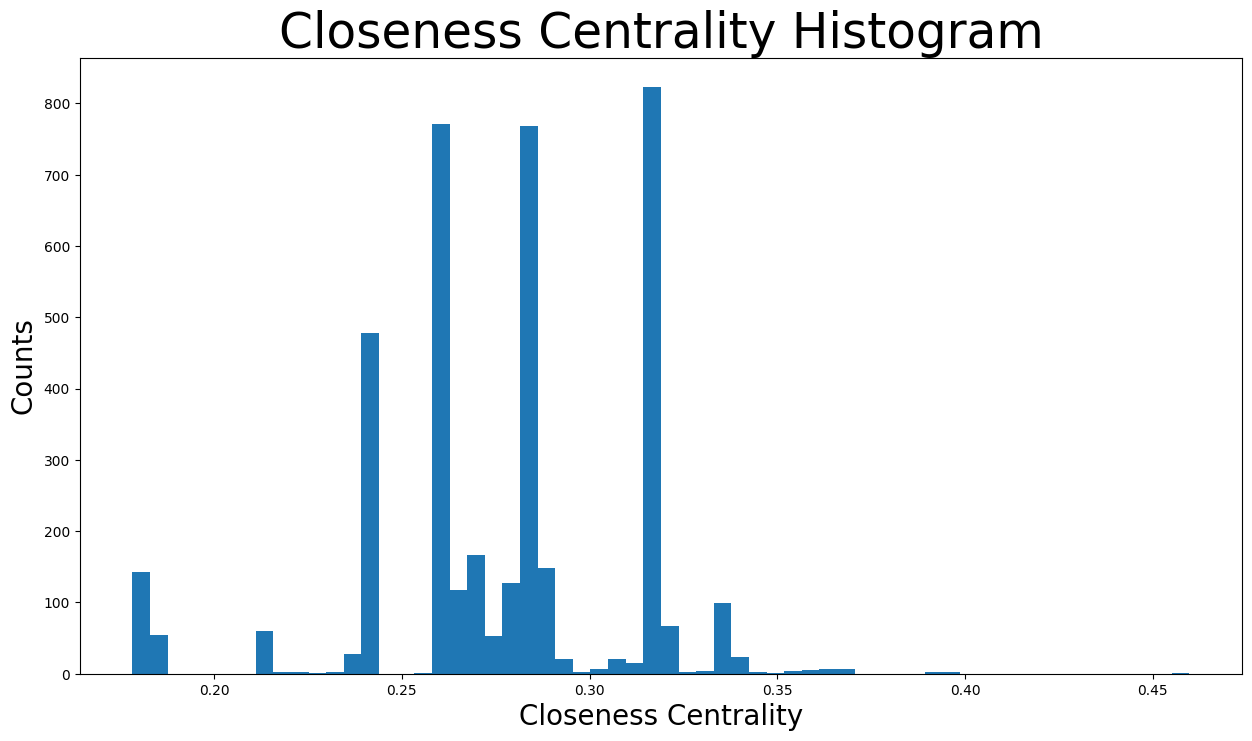

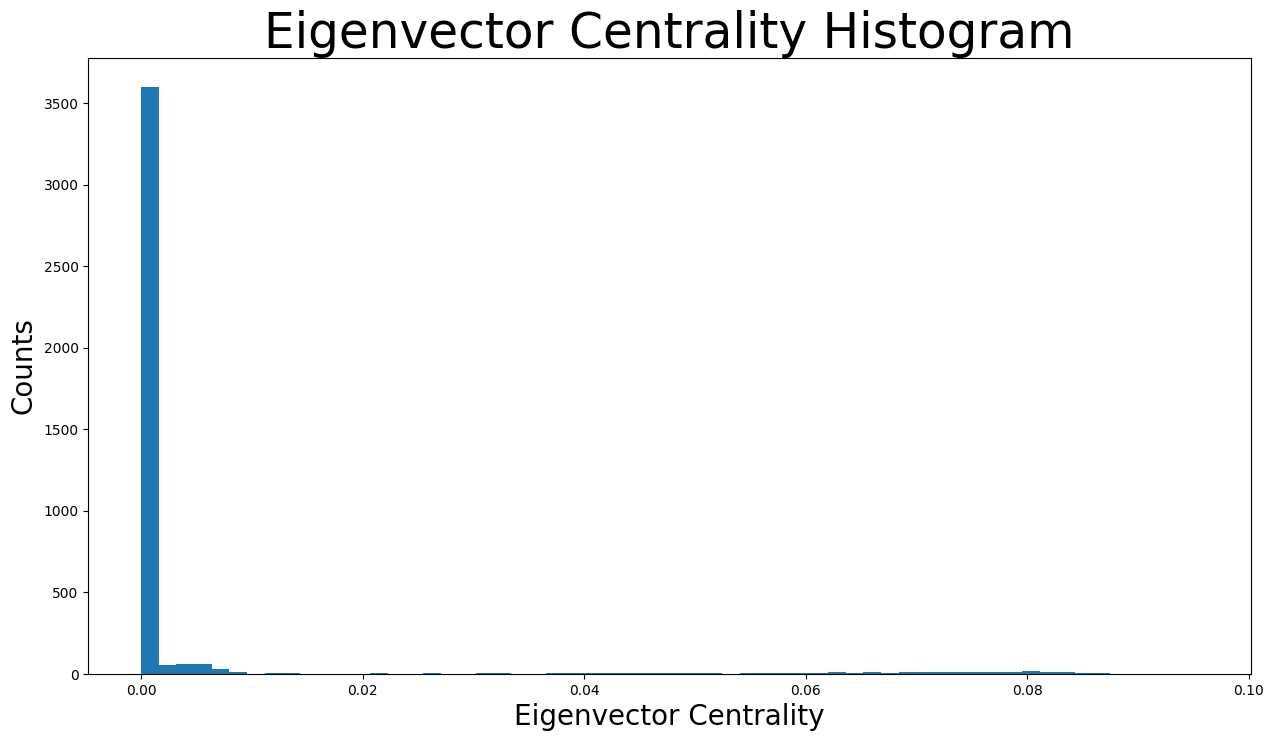

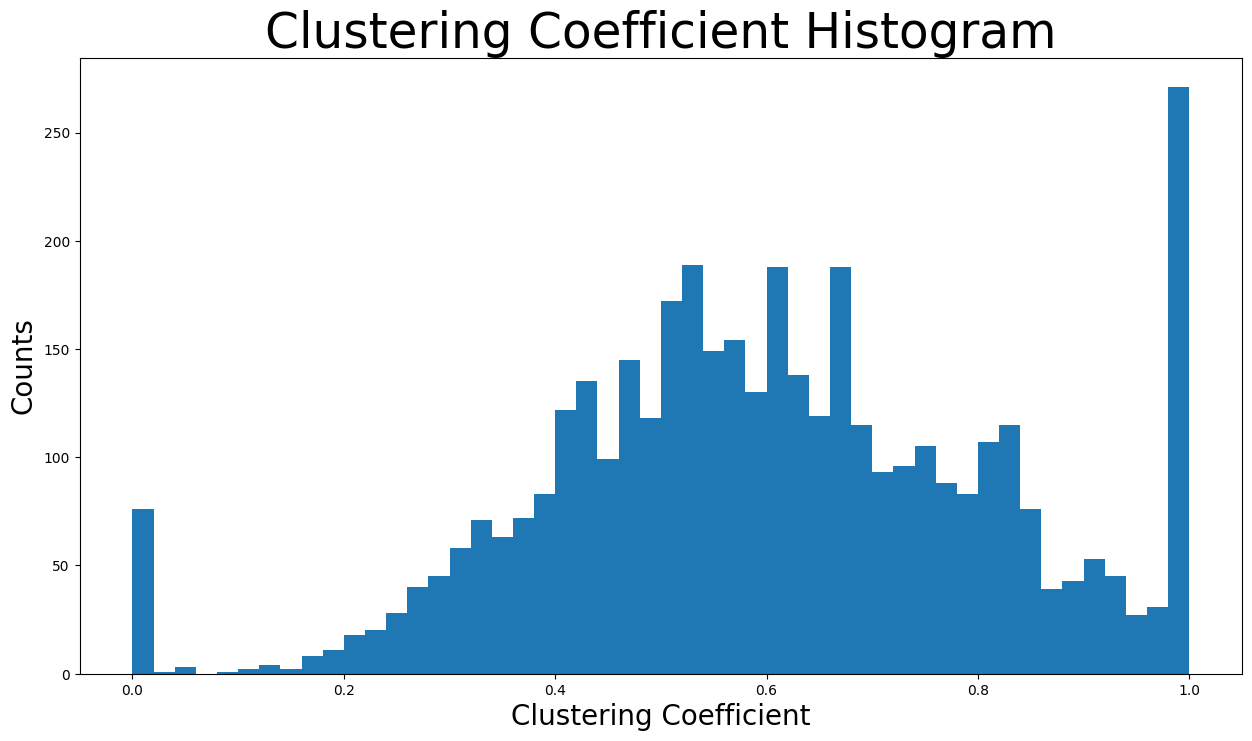

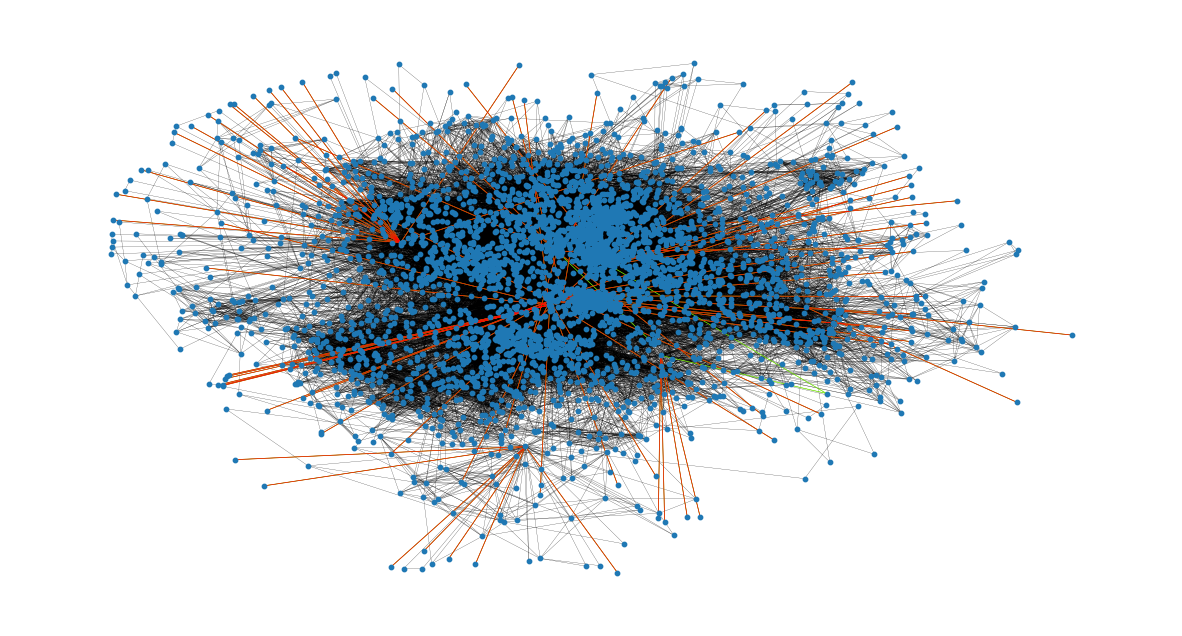

In [2]:
# Read data and convert to graph
facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

# Visualization settings
pos = nx.spring_layout(G, iterations=10, seed=1721)

# Compute graph metrics
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())

# Histogram of shortest path lengths
path_lengths = np.zeros(diameter + 1, dtype=int)
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plotting
plt.figure(figsize=(15, 8))
plt.bar(np.arange(1, diameter + 1), height=freq_percent)
plt.title("Distribution of Shortest Path Length in G", fontdict={"size": 35})
plt.xlabel("Shortest Path Length", fontdict={"size": 22})
plt.ylabel("Frequency (%)", fontdict={"size": 22})
plt.show()

# Degree centrality
degree_centrality = nx.degree_centrality(G)
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.title("Degree Centrality Histogram", fontdict={"size": 35})
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.title("Betweenness Centrality Histogram", fontdict={"size": 35})
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram", fontdict={"size": 35})
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.title("Eigenvector Centrality Histogram", fontdict={"size": 35})
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

# Clustering coefficient
clustering_vals = nx.clustering(G).values()
plt.figure(figsize=(15, 8))
plt.hist(clustering_vals, bins=50)
plt.title("Clustering Coefficient Histogram", fontdict={"size": 35})
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

# Bridges and local bridges
bridges = list(nx.bridges(G))
local_bridges = list(nx.local_bridges(G, with_span=False))
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15)
nx.draw_networkx_edges(G, pos, edgelist=local_bridges, width=0.5, edge_color="lawngreen")
nx.draw_networkx_edges(G, pos, edgelist=bridges, width=0.5, edge_color="r")
plt.axis("off")
plt.show()

In [3]:
def network_stats(G):
    try:
        diameter = nx.algorithms.distance_measures.diameter(G)
    except:
        diameter = "Cannot determine because graph is disconnected!"
    clustering_coefficient = approximation.average_clustering(G)
    number_of_nodes = G.number_of_nodes()
    number_of_edges = G.number_of_edges()
    number_of_connected_components = nx.number_connected_components(G)
    largest_connected_component = max([len(i) for i in list(nx.connected_components(G))])

    print("#"*10,"Network Statistics","#"*10)
    print(f"Diameter: {diameter}")
    print(f"Number of Nodes (users): {number_of_nodes}")
    print(f"Number of Edges (friendships): {number_of_edges}")
    print(f"Average Degree: {2*number_of_edges/number_of_nodes:.3f}")
    print(f"Average Clustering Coefficient: {clustering_coefficient}")
    print(f"Number of Connected Components: {number_of_connected_components}")
    print(f"Size of Largest Connected Component: {largest_connected_component}")
    print(f"Network has bridges: {nx.has_bridges(G)}")
    print(f"Number of bridges: {len(list(nx.bridges(G)))}")
    print(f"Number of local bridges: {len(list(nx.local_bridges(G,with_span=False)))}")

network_stats(G)

########## Network Statistics ##########
Diameter: 8
Number of Nodes (users): 4039
Number of Edges (friendships): 88234
Average Degree: 43.691
Average Clustering Coefficient: 0.61
Number of Connected Components: 1
Size of Largest Connected Component: 4039
Network has bridges: True
Number of bridges: 75
Number of local bridges: 78


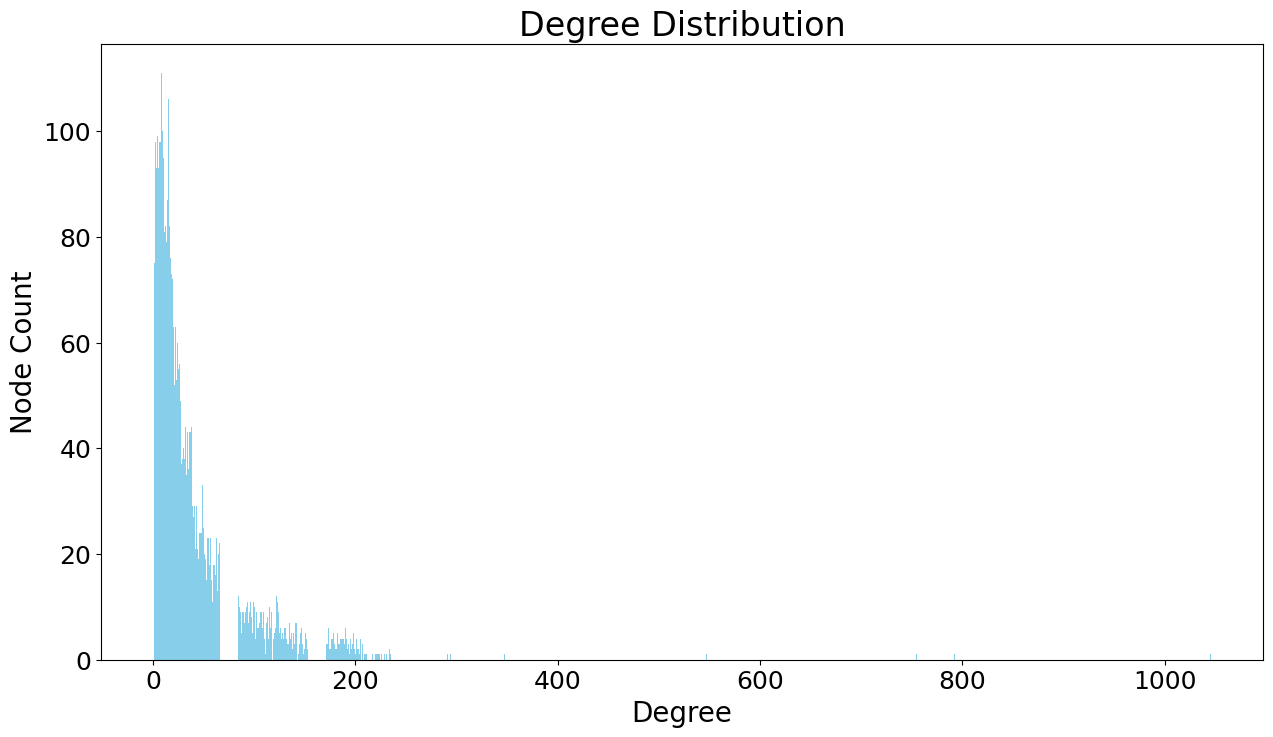

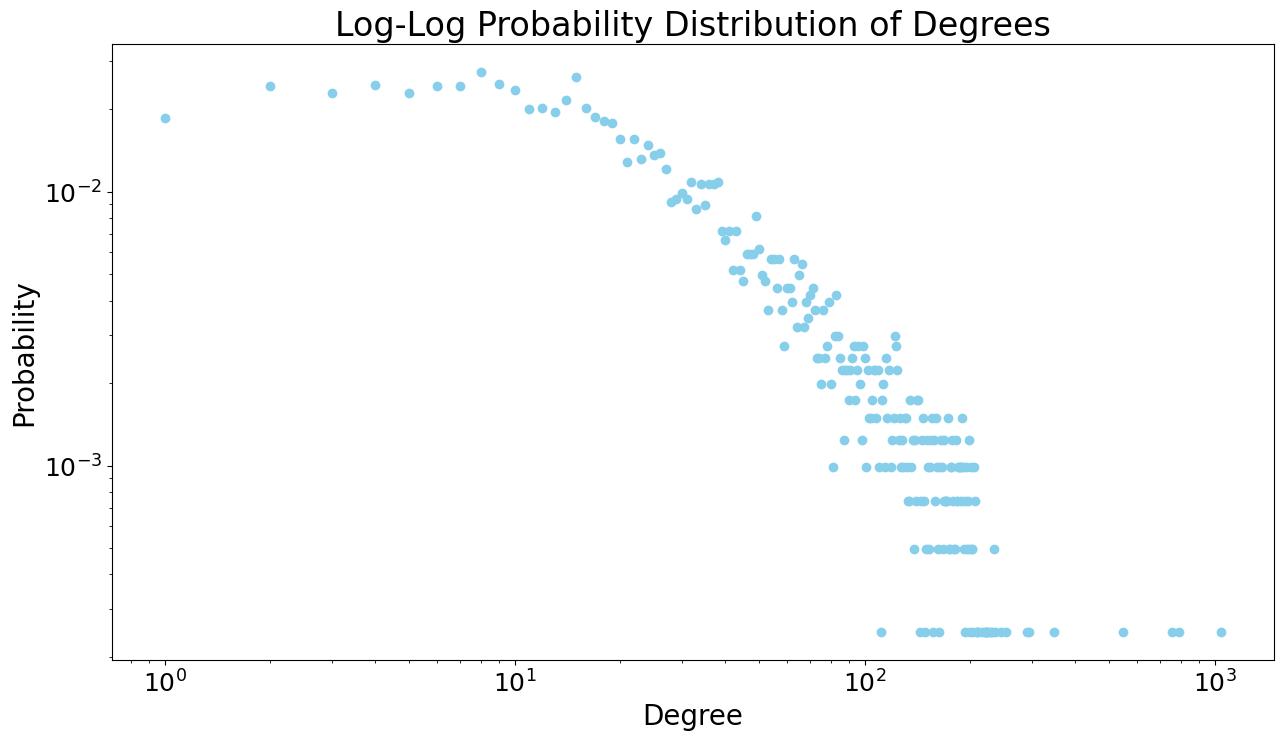

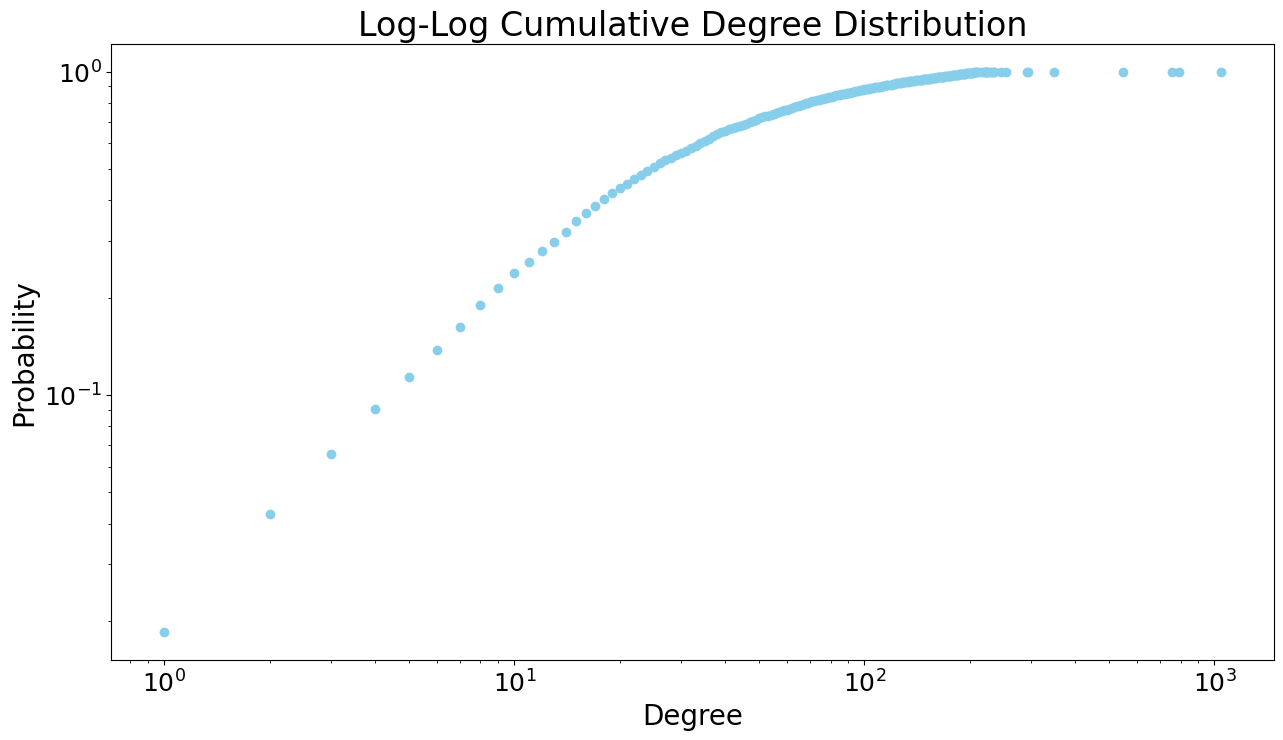

In [4]:
from collections import Counter

# Create a histogram of the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_counts = Counter(degree_sequence)
deg, cnt = zip(*degree_counts.items())

# 1. Degree Distribution
plt.figure(figsize=(15, 8))
plt.bar(deg, cnt, width=0.80, color="skyblue")
plt.title("Degree Distribution", fontsize=24)
plt.ylabel("Node Count", fontsize=20)
plt.xlabel("Degree", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# 2. Probability Distribution of Degrees
degree_probs = [i/sum(cnt) for i in cnt]
plt.figure(figsize=(15, 8))
plt.loglog(deg, degree_probs, 'o', color="skyblue")
plt.title("Log-Log Probability Distribution of Degrees", fontsize=24)
plt.ylabel("Probability", fontsize=20)
plt.xlabel("Degree", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# 3. Cumulative Degree Distribution
cum_degree_probs = np.cumsum(degree_probs[::-1])[::-1]
plt.figure(figsize=(15, 8))
plt.loglog(deg, cum_degree_probs, 'o', color="skyblue")
plt.title("Log-Log Cumulative Degree Distribution", fontsize=24)
plt.ylabel("Probability", fontsize=20)
plt.xlabel("Degree", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


In [5]:
# Degree Centrality: Display top 5 users with highest centralities
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354)]

In [6]:
# Display the number of neighbors for the nodes with highest degree centralities
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:5]

[(107, 1045), (1684, 792), (1912, 755), (3437, 547), (0, 347)]

In [7]:
# Display betweenness centrality of the top 5 users
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306)]

In [8]:
# Display eigenvector centrality of top 5 users
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

[(1912, 0.09540696149067629),
 (2266, 0.08698327767886552),
 (2206, 0.08605239270584342),
 (2233, 0.08517340912756598),
 (2464, 0.08427877475676092)]

In [9]:
# Display closeness centrality of top 5 users
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796)]